
<h1> Vaccinated Prediction - by Karthik Raj. R

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from math import radians, cos, sin, asin, sqrt

<h1> Summary of the models built and its result

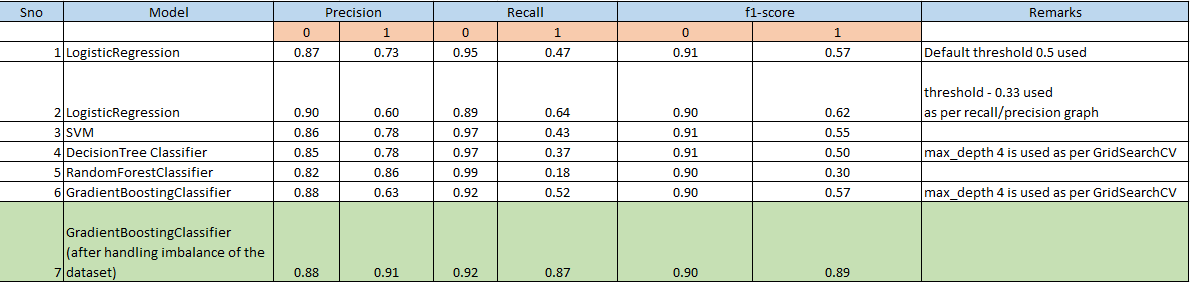

<b> Data Analysis and Model Building

In [ ]:
# load the csv file
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [ ]:
# inspect if the data has been loaded correctly
df.head()

In [ ]:
# verify the dataframe structure and check if there are any nullable records
df.info()

In [ ]:
# verify the # of records and columns
df.shape

In [ ]:
# verify if the provided data set is imbalanced i.e whether target variable has equal representation
df['h1n1_vaccine'].value_counts()

In [ ]:
#Observatrion it looks data is very much imbalanced, that is we have more representation for not vacinated scenario

In [ ]:
df['antiviral_medication'].value_counts()

In [ ]:
df.isnull().sum()

In [ ]:
df = df.fillna(0)

<b> Handle Categorical Variables (it should be converted as numeric value to build the model)

In [ ]:
# analyze various income_level
df['income_level'].value_counts()

In [ ]:
# Handle Income_level categorical variable
dummies = pd.get_dummies(df['income_level'],drop_first=True)
df = pd.concat([df, dummies], axis='columns')
df.drop(['income_level'], axis='columns',  inplace = True)
df.head()

In [ ]:
# Rename column heading
df.rename(columns = {'> $75,000':'Income > $75,000'}, inplace = True)
df.rename(columns = {'Below Poverty':'Income BelowPoverty'}, inplace = True)


In [ ]:
# Analyse Sex Variable
df['sex'].value_counts()

In [ ]:
# Encode sex variable such that Male should be represented as 1 and female should be represented as 0
df['sex_enc'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0 )

In [ ]:
# inspect the encoded value
df[['sex','sex_enc']]

In [ ]:
# Drop sex variable
df.drop(['sex'], axis='columns',  inplace = True)

In [ ]:
# Analyze qualification variable
df['qualification'].value_counts()

In [ ]:
# Handle qualification variable
dummies = pd.get_dummies(df['qualification'],drop_first=True)
df = pd.concat([df, dummies], axis='columns')
df.drop(['qualification'], axis='columns',  inplace = True)
df.head()

In [ ]:
# Rename columns
df.rename(columns = {'< 12 Years':'Qualification_12Years'}, inplace = True)
df.rename(columns = {'College Graduate':'Qualification_Grad'}, inplace = True)
df.rename(columns = {'Some College':'Qualification_Other'}, inplace = True)

In [ ]:
df.head()

In [ ]:
# Analyze race variable
df['race'].value_counts()

In [ ]:
# Handle race variable
dummies = pd.get_dummies(df['race'],drop_first=True)
df = pd.concat([df, dummies], axis='columns')
df.drop(['race'], axis='columns', inplace = True)
df.head()

In [ ]:
# Analyze age bracket variable
df['age_bracket'].value_counts()

In [ ]:
# Handle age_bracked variable
dummies = pd.get_dummies(df['age_bracket'],drop_first=True)
df = pd.concat([df, dummies], axis='columns')
df.drop(['age_bracket'], axis='columns', inplace = True)
df.head()

In [ ]:
# Analyze Marital status variable
df['marital_status'].value_counts()           

In [ ]:
# Encode marital status variable such that update Married as 1 otherwise 0 
df['marital_status_enc'] = df['marital_status'].apply(lambda x: 1 if x == 'Married' else 0)

In [ ]:
# View the encoded value
df[['marital_status','marital_status_enc']]

In [ ]:
# Drop marital status variable
df.drop(['marital_status'], axis='columns', inplace = True)


In [ ]:
# Analyze housing status variable
df['housing_status'].value_counts()

In [ ]:
# Encode housing_status variable such at 1 if Own else 0
df['housing_status_enc'] = df['housing_status'].apply(lambda x: 1 if x == 'Own' else 0)

In [ ]:
# inspect the encoded values
df[['housing_status','housing_status_enc']]

In [ ]:
# Drop housing_status variable
df.drop(['housing_status'], axis='columns',  inplace = True)

In [ ]:
# analyze employment variable
df['employment'].value_counts()

In [ ]:
# Handle employment variable
dummies = pd.get_dummies(df['employment'],drop_first=True)
df = pd.concat([df, dummies], axis='columns')
df.drop(['employment'], axis='columns', inplace = True)
df.head()

In [ ]:
# Analyze census_msa variable
df['census_msa'].value_counts()

In [ ]:
# handle census_msa variable
dummies = pd.get_dummies(df['census_msa'],drop_first=True)
df = pd.concat([df, dummies], axis='columns')
df.drop(['census_msa'], axis='columns',  inplace = True)
df.head()

In [ ]:
df.info()

<h2> Build a model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
df.head()

In [ ]:
df.drop('unique_id', axis = 1, inplace=True)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df = df.astype({"Income > $75,000": int })
df = df.astype({"Income BelowPoverty": int })
df = df.astype({"Qualification_12Years": int })




In [ ]:
df = df.astype({"Hispanic": int })
df = df.astype({"Other or Multiple": int })
df = df.astype({"White": int })
df = df.astype({"35 - 44 Years": int })
df = df.astype({"45 - 54 Years": int })
df = df.astype({"55 - 64 Years": int })
df = df.astype({"65+ Years": int })
df = df.astype({"Not in Labor Force": int })
df = df.astype({"Unemployed": int })
df = df.astype({"MSA, Principle City": int })
df = df.astype({"Non-MSA": int })


In [ ]:
df = df.astype({"Qualification_Other": int })
df = df.astype({"Qualification_Grad": int })


In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
# Get independent (x) and dependent variable (y) details
x=df.drop(['h1n1_vaccine'],axis=1)
y=df[['h1n1_vaccine']]

In [ ]:
# do train and test split of the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:
#standradize the values to ensure all indpendent variable are on the same scale 
#standardized_x = StandardScaler().fit_transform(x_train)

In [ ]:
# fit a model on train data using standradized data
model=LogisticRegression(random_state = 13)
model.fit(x_train,y_train)

In [ ]:
# measure the model performance on training data ( accuracy )
model.score(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
from sklearn.metrics import auc
pred_y=model.predict(x_test) 

probs_y=model.predict_proba(x_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first   column of   array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 
1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [ ]:
from sklearn.metrics import classification_report
threshold = 0.33

print('Valuation of test data with default threshold:')
LR_Grid_ytest_THR = ((model.predict_proba(x_test)[:, 1])>= threshold).astype(int)
print(classification_report(y_test, model.predict(x_test)))
print("----------------------------------------------------------------------")


print('Valuation for test data only  (new_threshold):')
print(classification_report(y_test, LR_Grid_ytest_THR))

<b> Model performance on both test and train data is consistent although there is a scope for improvement hence this could be a reasonably a better model

<h2> SVM Model Building

In [ ]:
 from sklearn import svm

In [ ]:
clf = svm.SVC(random_state = 13)

In [ ]:
# Fit the model using train data
clf.fit(x_train, y_train)

In [ ]:
# measure the accuracy of the model score on train data
clf.score(x_train,y_train)

In [ ]:
# Measure the accuracy of the model on test data
clf.score(x_test, y_test)

In [ ]:

print(classification_report(y_test, clf.predict(x_test)))
print("----------------------------------------------------------------------")


<b> Conclusion is SVM model performance is better than Simple Linear Regression model

## Decision Tree Classifier

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt



In [ ]:
# Build decison tree model with the depth = 2
clf_1 = DecisionTreeClassifier(max_depth=2,random_state=13)
clf_1.fit(x_train, y_train)
score = clf_1.score(x_train, y_train)
print("Decision Tree with depth 2 score on taining data is",score)

In [ ]:
# Measure the score against test data set
score = clf_1.score(x_test, y_test)
print("Decision Tree with depth 2 score on test data is",score)

<b> Building decision tree with max depth = 30

In [ ]:
# Build decison tree model with the depth = 30
clf_2 = DecisionTreeClassifier(max_depth=30,random_state=13)
clf_2.fit(x_train, y_train)
print("Decision Tree with depth 2 score on taining data is",score)

In [ ]:
# with Max depth = 30, the score on test data is 
score = clf_2.score(x_test, y_test)
score

<b>when the decision is built with max depth =30 it seem to have overfit the data and hence the score is low on test data
so we need to find what  is the optimum depth that must be used, GridSearch helps to find it

In [ ]:
from sklearn.model_selection import GridSearchCV
g_cv = GridSearchCV(DecisionTreeClassifier(random_state=13),
              param_grid={'max_depth': range(1, 10)},
             cv=5, refit=True)

g_cv.fit(x_train, y_train)
print("The optimum max depth is : ")
g_cv.best_params_



In [ ]:
# with max depth = 4 the score on train data is 
clf_3 = DecisionTreeClassifier(max_depth=4,random_state=13)
clf_3.fit(x_train, y_train)
score = clf_3.score(x_train, y_train)
print("Decision Tree with depth 4 score on taining data is",score)

In [ ]:
# with max depth = 5 the score on test data is 
clf_3.fit(x_test, y_test)
score = clf_3.score(x_test, y_test)
print("Decision Tree with depth 4 score on taining data is",score)

In [ ]:

print(classification_report(y_test, clf_3.predict(x_test)))
print("----------------------------------------------------------------------")

<b> Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100,max_depth=4, n_jobs = 1)

In [ ]:
rnd_clf.fit(x_train,y_train)

In [ ]:
rnd_clf.score(x_train,y_train) 

In [ ]:
rnd_clf.score(x_test,y_test) 

In [ ]:

print(classification_report(y_test, rnd_clf.predict(x_test)))
print("----------------------------------------------------------------------")

In [ ]:
feat_importances = pd.Series(rnd_clf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

<b> Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbmodel = GradientBoostingClassifier(max_depth=4, n_estimators=100, learning_rate=1.0)
gbmodel.fit(x_train,y_train)
gbmodel.score(x_train,y_train)

In [ ]:
gbmodel.score(x_test,y_test)

In [ ]:

print(classification_report(y_test, gbmodel.predict(x_test)))
print("----------------------------------------------------------------------")

<b> Handle imbalanced dataset and then try with all type of models

In [ ]:
#!pip install imbalanced-learn

In [ ]:
df['h1n1_vaccine'].value_counts()

In [ ]:
# the current data set has imbalance, i.e it does not have equal representation for both positive and negative cases

df['h1n1_vaccine'].value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='Vacinated')
plt.show()

In [ ]:
!pip install imblearn

In [ ]:
# using  Synthetic Minority Over-sampling Technique - SMOTE
from imblearn.over_sampling import SMOTE
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_train_b, y_train_b = SMOTE().fit_resample(x_train, y_train['h1n1_vaccine'])


In [ ]:
y_train_b.value_counts()

In [ ]:
# After synthetic data added verify if the data is balanced between postive and negative cases
pd.Series(y_train_b).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='Vacinated')
plt.show()

In [ ]:
# Train the model with the SMOTE data and verify the score of train dataset
gbmodel.fit(x_train_b,y_train_b)
gbmodel.score(x_train_b,y_train_b)

In [ ]:
# Verify the accuracy score of test data set
gbmodel.score(x_test_b,y_test_b)

In [ ]:
# Verify the classification report
print(classification_report(y_test_b, gbmodel.predict(x_test_b)))
print("----------------------------------------------------------------------")